In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [15]:
# Загрузим данные в датафрейм
states = pd.read_csv('D:\BSNS\STUDY\Stepik\Основы Статистики\states.csv')

In [3]:
states.head(10)

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6
5,Colorado,84.5,90.2,88.7,9.4,9.6
6,Connecticut,87.7,85.4,87.5,7.8,12.1
7,Delaware,80.1,76.3,88.7,8.1,13.1
8,District of Columbia,100.0,36.2,86.0,16.8,18.9
9,Florida,89.3,80.6,84.7,12.1,12.0


Рассмотрим зависимость бедности (poverty - зависимая переменная) от процента населения со средним образованием образования (hs_grad - независимая переменная).

In [4]:
# Посмотрим на "статистики" наших переменных
states[['poverty', 'hs_grad']].describe().T

,count,mean,std,min,25%,50%,75%,max
poverty,51.0,11.349020,3.099185,5.6,9.25,10.6,13.4,18.0
hs_grad,51.0,86.011765,3.725998,77.2,83.30,86.9,88.7,92.1


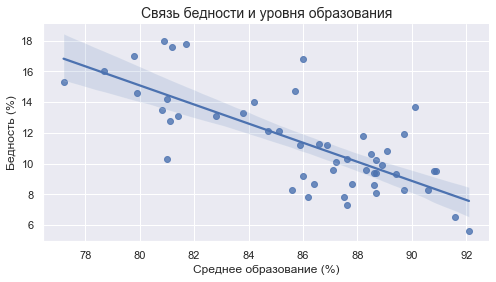

In [5]:
# Построим scatter-plot, чтобы визуально оценить распределение переменных

#define figure size
sns.set(rc={"figure.figsize":(8, 4)})

sns.regplot(x='hs_grad', y='poverty', data=states)

plt.title('Связь бедности и уровня образования', fontsize=14)
plt.xlabel('Среднее образование (%)', fontsize=12)
plt.ylabel('Бедность (%)', fontsize=12)
sns.despine()
plt.show()

In [6]:
# Построим модель
from scipy.stats import linregress

slope, intercept, r, p, std_err =  linregress(states['hs_grad'], states['poverty'])
print(linregress(states['hs_grad'], states['poverty']))

LinregressResult(slope=-0.6212167177940106, intercept=64.78096577010209, rvalue=-0.7468582531582505, pvalue=3.10882981031841e-10, stderr=0.0790164710017928)


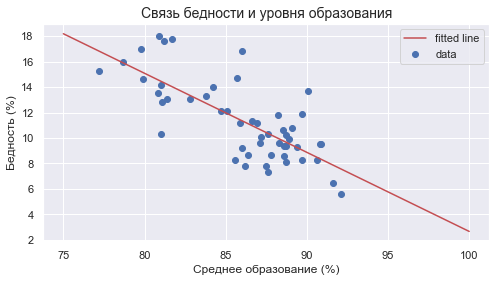

In [7]:
x = np.linspace(75, 100)

reg = lambda x: intercept + slope*x
plt.scatter(x='hs_grad', y='poverty', data=states, label='data')
plt.title('Связь бедности и уровня образования', fontsize=14)
plt.xlabel('Среднее образование (%)', fontsize=12)
plt.ylabel('Бедность (%)', fontsize=12)
plt.plot(x, reg(x), color='r', label='fitted line')
plt.legend()
plt.show()

In [8]:
print(f'''
slope = {slope:.2f}
intercept = {intercept:.2f}
r = {r:.2f}
r squared = {(r ** 2):.2f}
p = {p:.5f}
std_err = {std_err:.3f}
''')


slope = -0.62
intercept = 64.78
r = -0.75
r squared = 0.56
p = 0.00000
std_err = 0.079



In [9]:
# расчет F-статистики 
# подсмотренно тут: https://www.chem-astu.ru/science/reference/fischer.html
df = states['hs_grad'].size - 2 # число степеней свободы
F = r**2/(1-r**2)*df
p_val = stats.f.sf(F, 1, df)

print(f'''
F = {F:.2f}
p_val = {p_val:.2f}
''')


F = 61.81
p_val = 0.00



In [10]:
# Выводы
# 1. Мы наблюдаем взаимосвязь наших переменных с коэффициентом корреляции = -0.75 (обратная зависимость).
# 2. Согласно нашей модели, с каждым процентом увеличения уровня среднего образования, бедность будет снижаться на 0.62 %.
# 3. Примерно 56 % изменчивости уровня бедности зависит от уровня образования.
# 4. При уровне образования = 0 ожидаемая бедность будет = 64.78 %.

In [11]:
# Построим график QQ-Plot для оценки нормальности распределения остатков
# Запишем прдсказанные значения бедности (y) в массив
y_p = []
for x in states['hs_grad']:
    y_p.append(intercept + slope*x)
y_p_array = np.array(y_p)
y_p_array

array([15.14575002,  8.49873114, 12.72300482, 14.5245333 , 14.40028996,
        9.6790429 , 10.42450296,  9.6790429 , 11.35632804, 12.16390977,
       11.91542309,  9.80328625,  9.98965126, 11.41844971, 11.10784135,
        9.05782618,  9.74116457, 13.34422154, 15.20787169, 10.98359801,
       10.36238129, 10.67298965, 10.36238129,  7.87751442, 14.33816829,
        9.92752959,  8.8093395 ,  8.37448779, 11.60481473,  7.56690606,
       11.2320847 , 14.02755993, 12.47451813, 14.21392494,  9.05782618,
       10.61086798, 11.54269306, 10.79723299, 11.35632804, 14.46241163,
       14.58665497,  9.6790429 , 14.46241163, 16.82303516,  9.2441912 ,
        9.55479956, 10.23813795,  9.43055621, 15.89121008,  9.74116457,
        8.31236612])

In [12]:
# Рассчитаем остатки
residuals = []
for i in range(51):
    residuals.append(states['poverty'][i] - y_p[i])
residuals_array = np.array(residuals)

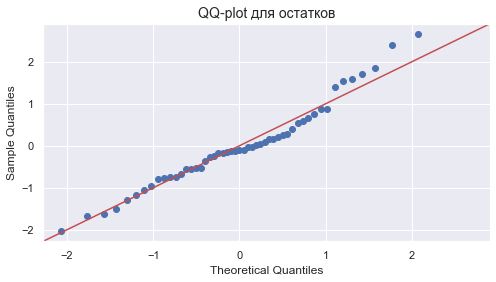

In [13]:
# Построим QQ-Plot
import statsmodels.api as sm

fig = sm.qqplot(residuals_array, line='45', fit=True)

plt.title('QQ-plot для остатков', fontsize=14)
plt.show()

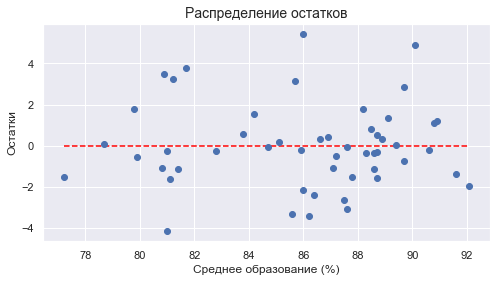

In [14]:
# Построим график распределения остатков на различных уровнях независимой переменной для оценки гомоскедастичности наших данных
plt.plot(states['hs_grad'], residuals, 'o')
plt.hlines(np.mean(residuals), states['hs_grad'].min(), states['hs_grad'].max(), linestyle='--', colors='red')

plt.title('Распределение остатков', fontsize=14)
plt.xlabel('Среднее образование (%)', fontsize=12)
plt.ylabel('Остатки', fontsize=12)
plt.show()